<a href="https://colab.research.google.com/github/yohanesnuwara/pyreservoir/blob/master/notebooks/well_testing_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 713 (delta 25), reused 0 (delta 0), pack-reused 657
Receiving objects: 100% (713/713), 1.77 MiB | 3.77 MiB/s, done.
Resolving deltas: 100% (379/379), done.


In [3]:
import sys
sys.path.append('/content/pyreservoir/welltest')

from wellanalysis import *

## Constant Rate Drawdown Test

/content/pyreservoir/welltest/wellanalysis.py:97: RuntimeWarning: divide by zero encountered in log
  y_fit = m1 * np.log(t) + c1


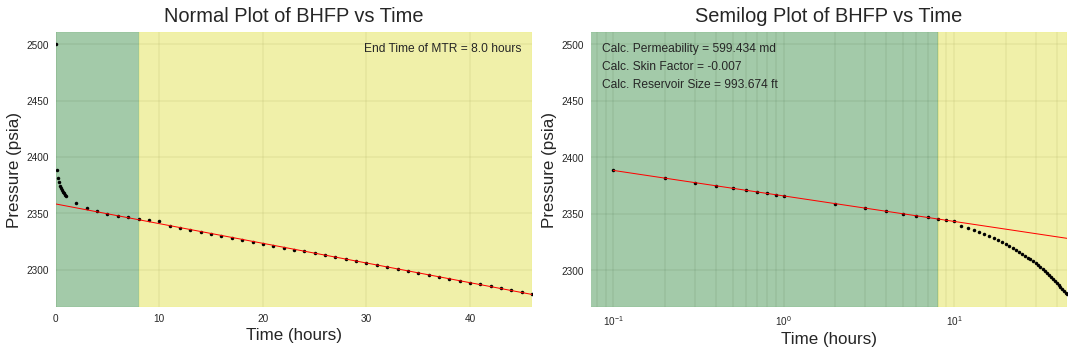

In [4]:
from scipy.optimize import curve_fit
import matplotlib.patches as mpl_patches

# known 
poro = 0.15 # Porosity
rw = 0.333 # Wellbore radius, ft
h = 32 # Reservoir thickness, ft
ct = 12E-06 # Total compressibility, sip
pi = 2500 # Initial reservoir pressure, psia
mu_oil = 2 # Oil viscosity, cp
Bo = 1.333 # Oil FVF, RB/STB

# define rate
q = 1000 # Well rate, STB/D

# load well-test data
df = pd.read_csv('/content/pyreservoir/data/welltest/welltest1_constant_rate_drawdown.csv')

t = df['t'].values
p = df['p'].values

# guess time index (input to user)
your_guess = 17

# well-test analysis
constant_rate_drawdown_test(t, p, q, Bo, mu_oil, h, poro, ct, rw, pi, your_guess)


## Multi Rate Drawdown Test

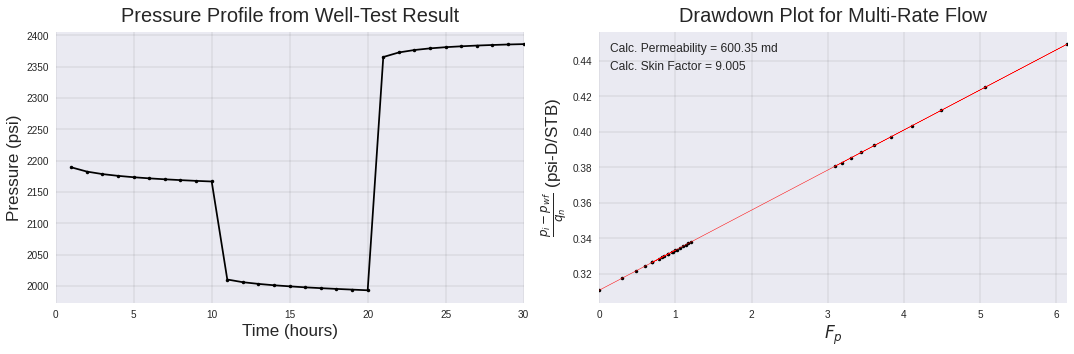

In [5]:
from scipy.optimize import curve_fit
import matplotlib.patches as mpl_patches

# known 
poro = 0.15 # Porosity
rw = 0.333 # Wellbore radius, ft
h = 32 # Reservoir thickness, ft
q = 1000 # Well rate, STB/D
ct = 12E-06 # Total compressibility, sip
pi = 2500 # Initial reservoir pressure, psia
mu_oil = 2 # Oil viscosity, cp
Bo = 1.333 # Oil FVF, RB/STB

# define rate-time steps
t_change = np.array([10, 20, 30])
q_change = np.array([1000, 1500, 300])

# load well-test data
df = pd.read_csv('/content/pyreservoir/data/welltest/welltest2_multi_rate_drawdown.csv')

t = df['t'].values
p = df['p'].values

# well-test analysis
multi_rate_drawdown_test(t, p, t_change, q_change, Bo, mu_oil, h, poro, ct, rw, pi)


## Constant Pressure Test

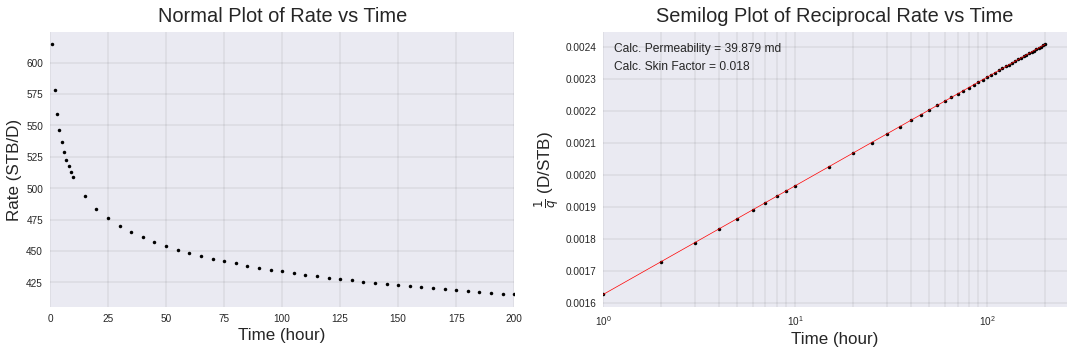

In [6]:
# known 
poro = 0.15 # Porosity
rw = 0.333 # Wellbore radius, ft
h = 32 # Reservoir thickness, ft
ct = 12E-06 # Total compressibility, sip
mu_oil = 2 # Oil viscosity, cp
Bo = 1.333 # Oil FVF, RB/STB
pi = 2500 # Initial reservoir pressure, psia

# define flowing pressure
pwf = 1500 # Wellbore Flowing Pressure, psia

# load well-test data
df = pd.read_csv('/content/pyreservoir/data/welltest/welltest3_constant_pressure.csv')

t = df['t'].values
q = df['q'].values

# well-test analysis
constant_pressure_test(t, q, pwf, pi, Bo, mu_oil, h, poro, ct, rw)

## Constant Rate Buildup Test

/content/pyreservoir/welltest/wellanalysis.py:322: RuntimeWarning: divide by zero encountered in true_divide
  x = (t_since_shutin + delta_t) / delta_t


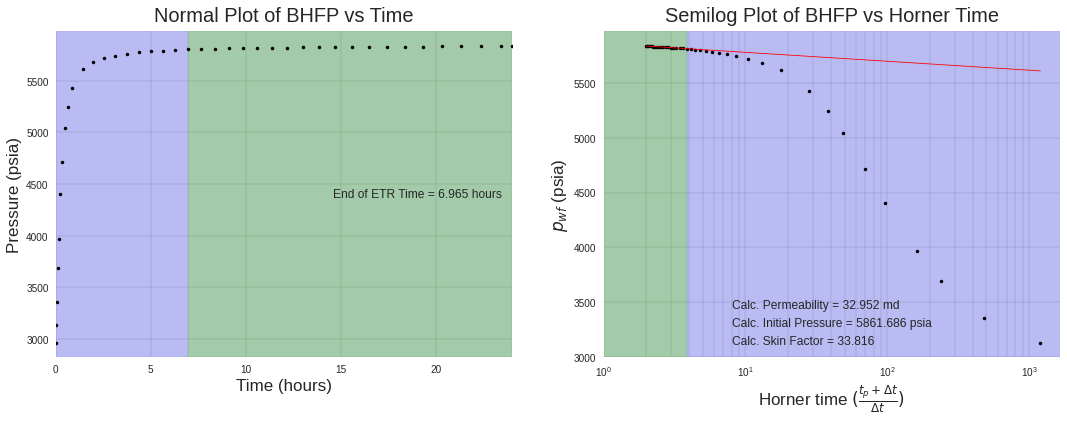

In [7]:
# known 
poro = 0.22 # Porosity
rw = 0.4 # Wellbore radius, ft
h = 86 # Reservoir thickness, ft
q = 1000 # Well rate, STB/D
ct = 9E-06 # Total compressibility, sip
mu_oil = 1 # Oil viscosity, cp
Bo = 1.421 # Oil FVF, RB/STB

# define time since shut-in for buildup
# the well is flowing in the first 24 hr, then shut-in
t_since_shutin = 24 # hours

# load well-test data
df = pd.read_csv('/content/pyreservoir/data/welltest/welltest4_constant_rate_buildup.csv')

t = df['t'].values
p = df['p'].values

# guess the end of straight line (end of wellbore storage effect)
your_guess = 19

# well-test analysis
constant_rate_buildup_test(t, p, q, Bo, mu_oil, h, poro, ct, rw, t_since_shutin, your_guess)
